Домашнее задание

    Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
    Реализовать самостоятельно логистическую регрессию
        Обучить ее методом градиентного спуска
        Методом nesterov momentum
        Методом rmsprop
    В качестве dataset'а взять Iris, оставив 2 класса:
        Iris Versicolor
        Iris Virginica





долго изучая суть вопроса наткнулся на данные материалы https://github.com/Arko98/Gradient-Descent-Algorithms, их и использовал в процессе выполнения домашнего задания

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [41]:
# сформируем из датасета входные данные

In [42]:
iris = datasets.load_iris()

In [52]:
data = pd.DataFrame(iris.data)
data1 = pd.DataFrame(iris.target)

In [53]:
data1.columns = ['target']

In [54]:
data = data.join(data1)

In [56]:
data

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
data = data[(data['target']==0) | (data['target']==2)]

In [59]:
# data

In [60]:
data['target'].loc[data['target']==2]=1

C:\Users\FED\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\FED\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
# data.loc[data['target']==2, 'target1'] = 1

In [62]:
data

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [63]:
# data['target'].value_counts()

In [66]:
x = np.array(data.iloc[:,:-1])

In [67]:
# y = np.array(data['target']).reshape(100,1)
y = np.array(data['target'])

In [68]:
x.shape

(100, 4)

In [69]:
y.shape

(100,)

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [71]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [72]:

#Gradient Discent
def GD(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                w = w - lr*dw
                b = b - lr*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Gradient Decent\nBatch Size = {}\nLearning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list



Loss after 0th epoch = 1.3030627468361267

Loss after 1th epoch = 0.8404408146019973

Loss after 2th epoch = 0.6224791821904143

Loss after 3th epoch = 0.49514252775005746

Loss after 4th epoch = 0.41146931838245626

Loss after 5th epoch = 0.3522192128918059

Loss after 6th epoch = 0.30802754158529844

Loss after 7th epoch = 0.27378288220200603

Loss after 8th epoch = 0.24645598059206608

Loss after 9th epoch = 0.22413636019571356

Loss after 10th epoch = 0.205558927937173

Loss after 11th epoch = 0.18985237881611847

Loss after 12th epoch = 0.17639687426639475

Loss after 13th epoch = 0.16473933082545195

Loss after 14th epoch = 0.15454081679986345

Loss after 15th epoch = 0.14554269457416952

Loss after 16th epoch = 0.13754414769291695

Loss after 17th epoch = 0.13038686109678133

Loss after 18th epoch = 0.1239443305629836

Loss after 19th epoch = 0.11811424676864486

Loss after 20th epoch = 0.11281296897044411

Loss after 21th epoch = 0.10797144830314807

Loss after 22th epoch = 0.1


Loss after 233th epoch = 0.011000812255199298

Loss after 234th epoch = 0.010955089377050638

Loss after 235th epoch = 0.010909748829427123

Loss after 236th epoch = 0.010864785821350496

Loss after 237th epoch = 0.010820195641679723

Loss after 238th epoch = 0.010775973657459397

Loss after 239th epoch = 0.010732115312300332

Loss after 240th epoch = 0.010688616124802167

Loss after 241th epoch = 0.010645471687023665

Loss after 242th epoch = 0.010602677662965822

Loss after 243th epoch = 0.010560229787125253

Loss after 244th epoch = 0.01051812386305834

Loss after 245th epoch = 0.010476355761984791

Loss after 246th epoch = 0.010434921421435329

Loss after 247th epoch = 0.010393816843921246

Loss after 248th epoch = 0.01035303809563973

Loss after 249th epoch = 0.010312581305204866

Loss after 250th epoch = 0.010272442662424521

Loss after 251th epoch = 0.010232618417077574

Loss after 252th epoch = 0.010193104877756407

Loss after 253th epoch = 0.010153898410707228

Loss after 254


Loss after 422th epoch = 0.0061672770547610695

Loss after 423th epoch = 0.0061530499190277825

Loss after 424th epoch = 0.006138888948868082

Loss after 425th epoch = 0.006124793682275004

Loss after 426th epoch = 0.006110763661527122

Loss after 427th epoch = 0.006096798433161643

Loss after 428th epoch = 0.006082897547904323

Loss after 429th epoch = 0.006069060560640582

Loss after 430th epoch = 0.0060552870303578294

Loss after 431th epoch = 0.006041576520097611

Loss after 432th epoch = 0.0060279285969057

Loss after 433th epoch = 0.006014342831799244

Loss after 434th epoch = 0.006000818799709877

Loss after 435th epoch = 0.005987356079441264

Loss after 436th epoch = 0.005973954253625022

Loss after 437th epoch = 0.005960612908680048

Loss after 438th epoch = 0.005947331634773534

Loss after 439th epoch = 0.005934110025762421

Loss after 440th epoch = 0.005920947679172167

Loss after 441th epoch = 0.005907844196143231

Loss after 442th epoch = 0.005894799181387939

Loss after 

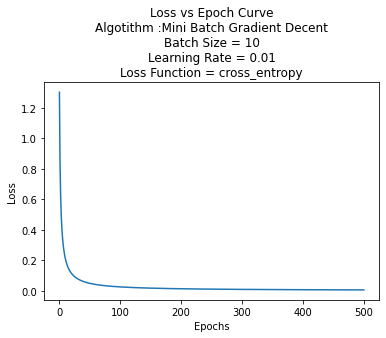

In [73]:
W,B = GD(x,y,500,10,'cross_entropy',0.01)

In [74]:
#Mini Batch Nesterov accelerated Gradient Discent
def Nesterov_GD(x,y,epochs,batch_size,loss,eta,lr):
    w = np.random.randn()
    b = np.random.randn()
    prev_w_look_ahead,prev_b_look_ahead = 0,0
    points = 0
    l_list = []
    w_list = []
    b_list = []
    ep = [i for i in range(epochs+1)]
    dw_look_ahead,db_look_ahead = 0,0
    #First Look Ahead Point
    w_look_ahead = w - lr*prev_w_look_ahead                      #W_look_ahead = w_t - lr*w_update_t-1
    b_look_ahead = b - lr*prev_b_look_ahead                      #B_look_ahead = b_t - lr*b_update_t-1
    for i in range(epochs+1):
        dw_look_ahead,db_look_ahead = 0,0
        for j in range(x.shape[0]):
            #Gradients w.r.t Look Ahead Points
            if (loss == 'mse'):
                dw_look_ahead += grad_w_mse(x[j],y[j],w_look_ahead,b_look_ahead)      
                db_look_ahead += grad_b_mse(x[j],y[j],w_look_ahead,b_look_ahead)
            elif (loss == 'cross_entropy'):
                dw_look_ahead += grad_w_cross(x[j],y[j],w_look_ahead,b_look_ahead)
                db_look_ahead += grad_b_cross(x[j],y[j],w_look_ahead,b_look_ahead)
            points += 1
            if(points % batch_size == 0):
                updated_w = lr*prev_w_look_ahead + eta*dw_look_ahead         #w_update_t = lr*w_update_t-1 + eta*gradient(w_look_ahead)
                updated_b = lr*prev_b_look_ahead + eta*db_look_ahead         #b_update_t = lr*b_update_t-1 + eta*gradient(b_look_ahead)
                w = w - updated_w                                            #W_(t+1) = w_t - w_update_t
                b = b - updated_w                                            #B_(t+1) = b_t - b_update_t
                prev_w_look_ahead = updated_w
                prev_b_look_ahead = updated_b
                #New Look Ahead point after mini batch parameter update
                w_look_ahead = w - lr*prev_w_look_ahead                     
                b_look_ahead = b - lr*prev_b_look_ahead
                dw_look_ahead,db_look_ahead = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm : Nesterov Accelerated Gradient Decent\nBatch Size = {}\nLearning Rate(Gamma) = {}\nEta = {}\nLoss Function = {}'.format(batch_size,lr,eta,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 1.6548812143145244e-06

Loss after 1th epoch = 1.6548596702112556e-06

Loss after 2th epoch = 1.6548381298827455e-06

Loss after 3th epoch = 1.654816593551039e-06

Loss after 4th epoch = 1.6547950530004853e-06

Loss after 5th epoch = 1.6547735160026437e-06

Loss after 6th epoch = 1.6547519781166262e-06

Loss after 7th epoch = 1.6547304426730982e-06

Loss after 8th epoch = 1.6547089065634373e-06

Loss after 9th epoch = 1.6546873708978648e-06

Loss after 10th epoch = 1.6546658350102475e-06

Loss after 11th epoch = 1.6546443022312557e-06

Loss after 12th epoch = 1.6546227692302188e-06

Loss after 13th epoch = 1.6546012355630488e-06

Loss after 14th epoch = 1.654579701673835e-06

Loss after 15th epoch = 1.654558170449156e-06

Loss after 16th epoch = 1.654536637448119e-06

Loss after 17th epoch = 1.6545151068895743e-06

Loss after 18th epoch = 1.6544935781073854e-06

Loss after 19th epoch = 1.6544720463275953e-06

Loss after 20th epoch = 1.654450517767453e-06

Loss af


Loss after 230th epoch = 1.6499418833616772e-06

Loss after 231th epoch = 1.6499204722631575e-06

Loss after 232th epoch = 1.649899062052814e-06

Loss after 233th epoch = 1.6498776536188296e-06

Loss after 234th epoch = 1.6498562445187096e-06

Loss after 235th epoch = 1.6498348367508583e-06

Loss after 236th epoch = 1.6498134274286952e-06

Loss after 237th epoch = 1.649792022769468e-06

Loss after 238th epoch = 1.6497706167779743e-06

Loss after 239th epoch = 1.6497492112305678e-06

Loss after 240th epoch = 1.649727803906808e-06

Loss after 241th epoch = 1.649706400801893e-06

Loss after 242th epoch = 1.649684996808802e-06

Loss after 243th epoch = 1.6496635923716206e-06

Loss after 244th epoch = 1.6496421894887515e-06

Loss after 245th epoch = 1.649620786827927e-06

Loss after 246th epoch = 1.6495993852773252e-06

Loss after 247th epoch = 1.6495779832826366e-06

Loss after 248th epoch = 1.6495565846186152e-06

Loss after 249th epoch = 1.6495351828459703e-06

Loss after 250th epoch = 

Loss after 411th epoch = 1.6460757334583663e-06

Loss after 412th epoch = 1.6460544245003873e-06

Loss after 413th epoch = 1.6460331173187634e-06

Loss after 414th epoch = 1.6460118081387392e-06

Loss after 415th epoch = 1.6459904996248479e-06

Loss after 416th epoch = 1.645969192221181e-06

Loss after 417th epoch = 1.645947887037959e-06

Loss after 418th epoch = 1.6459265822988274e-06

Loss after 419th epoch = 1.6459052752282266e-06

Loss after 420th epoch = 1.6458839709331847e-06

Loss after 421th epoch = 1.6458626675263206e-06

Loss after 422th epoch = 1.645841363453323e-06

Loss after 423th epoch = 1.6458200600464584e-06

Loss after 424th epoch = 1.6457987590820866e-06

Loss after 425th epoch = 1.6457774572295352e-06

Loss after 426th epoch = 1.6457561555990285e-06

Loss after 427th epoch = 1.6457348548567003e-06

Loss after 428th epoch = 1.6457135554466412e-06

Loss after 429th epoch = 1.6456922551484005e-06

Loss after 430th epoch = 1.6456709559603856e-06

Loss after 431th epoch 

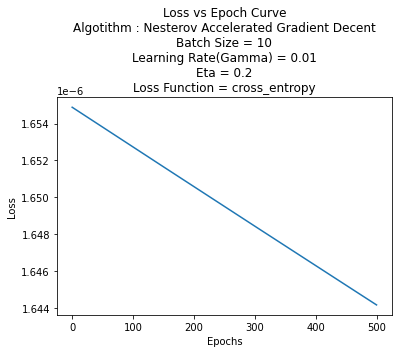

In [77]:
W1,B1 = Nesterov_GD(x,y,500,10,'cross_entropy',0.2,0.01)

In [78]:
def RMSProp(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    epsilon = 0.5
    beta = 0.95
    update_w, update_b = 0,0
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                update_w = beta * update_w + (1 - beta)* dw**2
                update_b = beta * update_b + (1- beta) * db**2 
                w = w - (lr/np.sqrt(update_w + epsilon))*dw
                b = b - (lr/np.sqrt(update_b + epsilon))*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch RMSProp\nBatch Size = {}\nInitial Learning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 2.852895468199568

Loss after 1th epoch = 1.907462602889151

Loss after 2th epoch = 1.398456454279918

Loss after 3th epoch = 1.0727418129368618

Loss after 4th epoch = 0.8462739729082535

Loss after 5th epoch = 0.681229896517907

Loss after 6th epoch = 0.5574588536275645

Loss after 7th epoch = 0.46293451843485367

Loss after 8th epoch = 0.38984387965703093

Loss after 9th epoch = 0.33277348943165225

Loss after 10th epoch = 0.2878016368211968

Loss after 11th epoch = 0.25201521165156615

Loss after 12th epoch = 0.22322939668171504

Loss after 13th epoch = 0.19980426778259402

Loss after 14th epoch = 0.18051122731237026

Loss after 15th epoch = 0.16443052001428132

Loss after 16th epoch = 0.1508722070545718

Loss after 17th epoch = 0.13931618259555542

Loss after 18th epoch = 0.1293674866844405

Loss after 19th epoch = 0.12072348504817373

Loss after 20th epoch = 0.11314996118089776

Loss after 21th epoch = 0.10646374786052781

Loss after 22th epoch = 0.10052008

Loss after 247th epoch = 0.007600710911952781

Loss after 248th epoch = 0.007570090361030774

Loss after 249th epoch = 0.007539718056116381

Loss after 250th epoch = 0.007509590980758367

Loss after 251th epoch = 0.0074797061672607435

Loss after 252th epoch = 0.007450060695691807

Loss after 253th epoch = 0.007420651692934662

Loss after 254th epoch = 0.007391476331744274

Loss after 255th epoch = 0.007362531829842947

Loss after 256th epoch = 0.007333815449021328

Loss after 257th epoch = 0.007305324494274062

Loss after 258th epoch = 0.007277056312939915

Loss after 259th epoch = 0.007249008293892011

Loss after 260th epoch = 0.007221177866710257

Loss after 261th epoch = 0.007193562500895267

Loss after 262th epoch = 0.007166159705095461

Loss after 263th epoch = 0.007138967026353982

Loss after 264th epoch = 0.007111982049373551

Loss after 265th epoch = 0.007085202395791079

Loss after 266th epoch = 0.007058625723469078

Loss after 267th epoch = 0.007032249725828927

Loss after 2

Loss after 482th epoch = 0.003911191178156492

Loss after 483th epoch = 0.0039031787039233777

Loss after 484th epoch = 0.0038951993359365757

Loss after 485th epoch = 0.003887252868753607

Loss after 486th epoch = 0.003879339098623713

Loss after 487th epoch = 0.0038714578234848376

Loss after 488th epoch = 0.003863608842929773

Loss after 489th epoch = 0.0038557919582102415

Loss after 490th epoch = 0.0038480069721986035

Loss after 491th epoch = 0.003840253689385507

Loss after 492th epoch = 0.0038325319158579044

Loss after 493th epoch = 0.0038248414592807283

Loss after 494th epoch = 0.0038171821288908786

Loss after 495th epoch = 0.0038095537354651435

Loss after 496th epoch = 0.003801956091317409

Loss after 497th epoch = 0.003794389010282009

Loss after 498th epoch = 0.003786852307689383

Loss after 499th epoch = 0.003779345800367882

Loss after 500th epoch = 0.003771869306600754



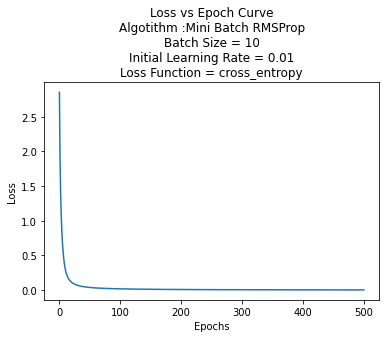

In [79]:
W2,B2 = RMSProp(x,y,500,10,'cross_entropy',0.01)